In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load test and train data
Xtrain = pd.read_csv('./dummy_data/X_train.csv',index_col = 'Id')
Xtest = pd.read_csv('./dummy_data/X_test.csv',index_col = 'Id')
ytrain = pd.read_csv('./dummy_data/y_train.csv',header=None,index_col=0)
ytest = pd.read_csv('./dummy_data/y_test.csv',header=None,index_col=0)

In [9]:
Xtrain = Xtrain.drop('SoldTime',axis=1)

In [12]:
Xtest = Xtest.drop('SoldTime',axis=1)

In [19]:
clf = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                   param_grid = {'n_estimators':(100,300,500),
                                'max_depth':range(3,9)},
                  error_score='neg_mean_squared_error',
                  cv=5,verbose=0)
clf.fit(Xtrain,ytrain)


GridSearchCV(cv=5, error_score='neg_mean_squared_error',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(3, 9),
  

In [20]:
training_accuracy = best_model.score(Xtrain, ytrain)
test_accuracy = best_model.score(Xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.965444
Accuracy on test data:     0.868805


In [21]:
best_model = clf.best_estimator_
best_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [22]:
best_score = clf.best_score_ 
best_score

0.8297547684256237

## PCA to decomposite feature dimension

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [24]:
scaler = StandardScaler()

x_scale = scaler.fit_transform(Xtrain)
testx_scale = scaler.transform(Xtest)
y_scale = scaler.fit_transform(ytrain)
testy_scale = scaler.transform(ytest)

Text(0.5, 0, 'n_components')

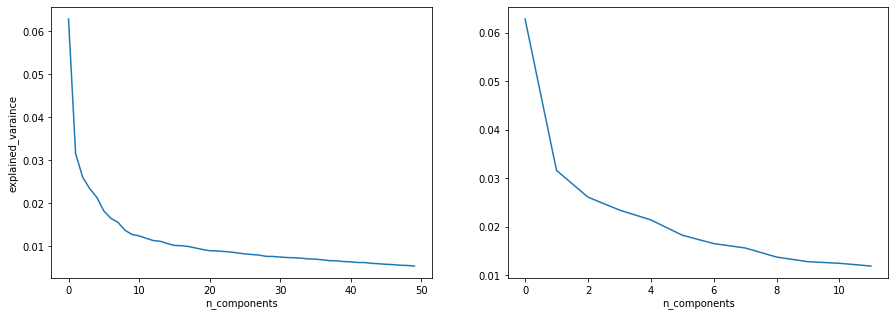

In [42]:
#fit pca and plot explained variance
n = 50
pca = PCA(n_components = n)
pca_data = pca.fit(x_scale)
eigenvalue = pca.explained_variance_ratio_
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.plot(range(len(eigenvalue)),eigenvalue)
plt.xlabel('n_components')
plt.ylabel('explained_varaince')
k = 12
ax2 = fig.add_subplot(122)
ax2.plot(range(k),eigenvalue[:k])
plt.xlabel('n_components')

In [47]:
pca.components_.shape

(50, 318)

In [60]:
# the first 10 components are most relevent.
#eigenvectors
xtrain = pd.DataFrame(np.dot(x_scale,pca.components_[:10].T))
xtrain.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.709530,-3.547133,0.972446,-3.011392,0.448685,1.032131,1.367590,2.270753,0.498647,1.363126
1,5.821966,3.084321,0.340453,-0.405681,3.093381,-4.436127,-1.814656,1.670998,0.495823,-2.891696
2,5.929034,4.985997,-0.140588,0.097277,-1.377647,1.121025,-0.315198,-1.394783,-0.023966,-3.444041
3,3.854373,-4.434113,3.375531,5.100759,3.527416,-0.308077,2.580052,0.758753,1.492904,0.017626
4,6.127294,4.377552,-0.121474,1.254217,-0.968846,-0.891970,-1.887737,-0.589680,-0.709528,-2.725270


In [61]:
xtrain.shape

(1022, 10)

In [62]:
clf = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                   param_grid = {'n_estimators':(300,500,800),
                                'max_depth':range(3,9)},
                  error_score='neg_mean_squared_error',
                  cv=5,verbose=0)
clf.fit(xtrain,y_scale)

GridSearchCV(cv=5, error_score='neg_mean_squared_error',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(3, 9),
  

In [63]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [64]:
clf.best_score_

0.850849500242437

In [66]:
xtest = pd.DataFrame(np.dot(testx_scale,pca.components_[:10].T))
xtest.shape

(438, 10)

In [67]:
training_accuracy = clf.best_estimator_.score(xtrain, y_scale)
test_accuracy = clf.best_estimator_.score(xtest, testy_scale)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.961562
Accuracy on test data:     0.829658


In [68]:
# choose first 20 components are most relevent.
#eigenvectors
xtrain = pd.DataFrame(np.dot(x_scale,pca.components_[:20].T))
xtest = pd.DataFrame(np.dot(testx_scale,pca.components_[:20].T))
clf = GridSearchCV(estimator = RandomForestRegressor(random_state=42),
                   param_grid = {'n_estimators':(300,500,800),
                                'max_depth':range(7,12)},
                  error_score='neg_mean_squared_error',
                  cv=5,verbose=0)
clf.fit(xtrain,y_scale)


GridSearchCV(cv=5, error_score='neg_mean_squared_error',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(7, 12),
 

In [69]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [70]:
clf.best_score_

0.851816003450789

In [71]:
training_accuracy = clf.best_estimator_.score(xtrain, y_scale)
test_accuracy = clf.best_estimator_.score(xtest, testy_scale)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.976616
Accuracy on test data:     0.821400
